# Credit Card Fraud Detection Model

### OBJECTIVE:
    
1. Build a machine learning model to identify fraudulent credit card transactions.
2. Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.
3. Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.
4. Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results.

Let's start by first importing all the required dependencies

### Importing required Libraries

In [1]:
# importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

### Importing the data set

In [2]:
ccf = pd.read_csv('creditcard.csv')

ccf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
ccf.shape

(284807, 31)

In [4]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that the dataset does not contain any null values but it is sure there must be some duplicate values which we will look into moving further. 

The data set contains two data types i.e. float, and integer. Class is the only column having integer values. So let us see the unique values in that column

In [5]:
#Checking 'Class' column for unique values
ccf['Class'].unique()

array([0, 1], dtype=int64)

In [6]:
# looking into the statistical inferences of the data

ccf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# checking the value counts of class column

class_count = ccf['Class'].value_counts()

class_count

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# count of duplicated rows in the dataset

duplicate_count = ccf.duplicated().sum()

duplicate_count

1081

In [9]:
# let us remove the duplicates

ccf = ccf.drop_duplicates(keep='first')

### Exploratory Data Analysis

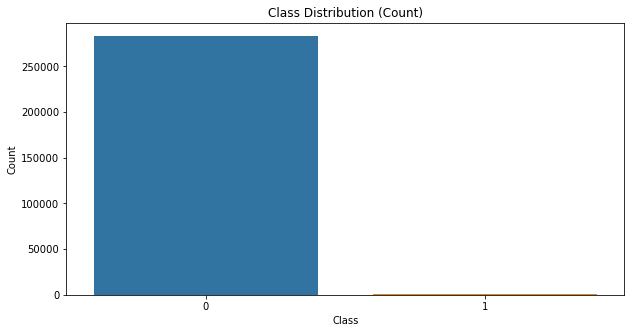

In [10]:
#Creating Bar chart to show class distribustion of our data in bar chart
plt.figure(figsize=(10, 5))
sns.countplot(data = ccf, x='Class')
plt.title('Class Distribution (Count)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [11]:
#checking for the fraud count in the data

Count = ccf['Class'].value_counts()
print("Percernt of Frauds on data: %f" % (Count[1]*100/Count.sum()))
print("Total sum of frauds: %f" % (Count[1]))
print("Percernt of Non Frauds on data: %f" % (Count[0]*100/Count.sum()))
print("Total sum of Non frauds: %f" % (Count[0]))

Percernt of Frauds on data: 0.166710
Total sum of frauds: 473.000000
Percernt of Non Frauds on data: 99.833290
Total sum of Non frauds: 283253.000000


From the above inference we can see that only 473 values are Fraud against 283253. 

16.978803370060476


<AxesSubplot:xlabel='Amount', ylabel='Count'>

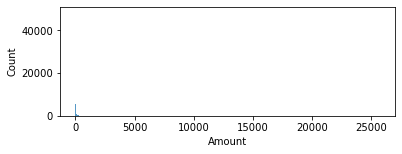

In [12]:
# checking fraud by transaction amount

print(ccf['Amount'].skew())

plt.figure(figsize=(6, 2))
sns.histplot(ccf['Amount'])

We can see that the data for these two days transaction has very high skewness

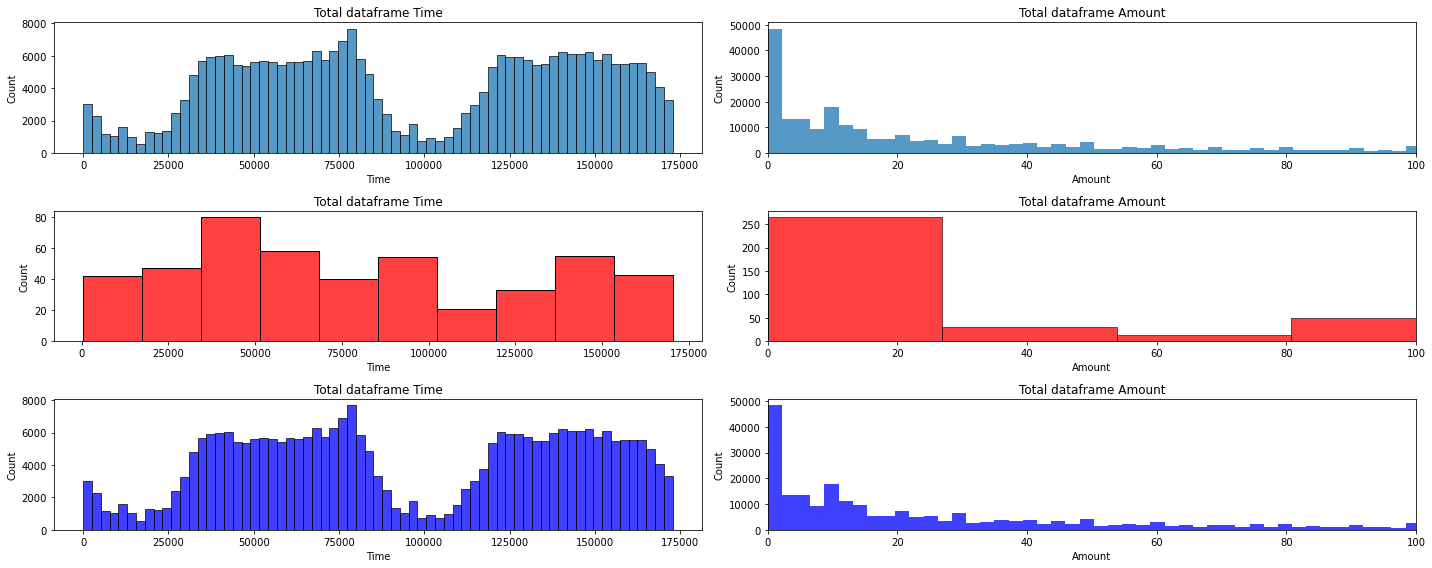

In [13]:
# Let us see the relationship between fraud and non-fraud with Time

fig, ax = plt.subplots(3,2, figsize=(20,8))
#Time and amount for Frauds Series.
Val_Time_Fraud = ccf['Time'][ccf['Class'] == 1]
Val_Amount_Fraud = ccf['Amount'][ccf['Class'] == 1]
    
#Time and amount for nonFrauds Series.
Val_Time_nFraud = ccf['Time'][ccf['Class'] == 0]
Val_Amount_nFraud = ccf['Amount'][ccf['Class'] == 0]
    
#Total data Hisplots
sns.histplot(data=ccf, x='Time', ax=ax[0,0])
ax[0,0].set_title('Total dataframe Time')

sns.histplot(data=ccf, x='Amount', ax=ax[0,1])
ax[0,1].set_title('Total dataframe Amount')
ax[0,1].set_xlim(0,100)
    
#Fraud data Hisplots
sns.histplot(Val_Time_Fraud, ax=ax[1,0], color='Red')
ax[1,0].set_title('Total dataframe Time')

sns.histplot(Val_Amount_Fraud, ax=ax[1,1], color='Red')
ax[1,1].set_title('Total dataframe Amount')
ax[1,1].set_xlim(0,100)
    
#Non Fraud data Hisplots
sns.histplot(Val_Time_nFraud, ax=ax[2,0], color='Blue')
ax[2,0].set_title('Total dataframe Time')

sns.histplot(Val_Amount_nFraud, ax=ax[2,1], color='Blue')
ax[2,1].set_title('Total dataframe Amount')
ax[2,1].set_xlim(0,100)
    
plt.tight_layout()  #To adjust Subplots
plt.show()

We can see that majority of fraud is in the range of 20 dollars

Now Let us look at the ouliers

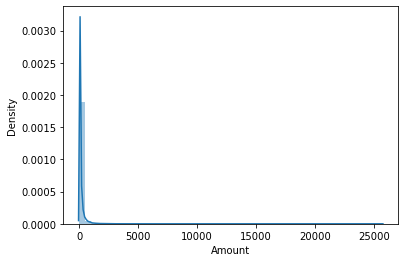

In [14]:
sns.distplot(ccf['Amount'])
plt.show()

<AxesSubplot:xlabel='Amount'>

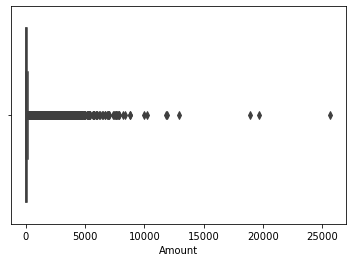

In [15]:
sns.boxplot(ccf['Amount'])

In [16]:
ccf['Amount'].skew()

16.978803370060476

We will now use power transformer to reduce skewness in the data

In [17]:
pwr_trf = PowerTransformer(method='yeo-johnson')   #power transformer is use for reduction of skewness of our data 
ccf['Amount'] = pwr_trf.fit_transform(ccf[['Amount']])
ccf['Amount'].skew()

0.018234140699062658

lets us see the distribution plot again to see the skewness changes are applied correctly or not

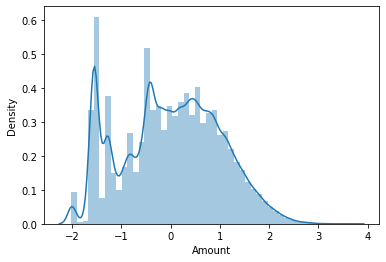

In [18]:
sns.distplot(ccf['Amount'])
plt.show()

<AxesSubplot:xlabel='Amount'>

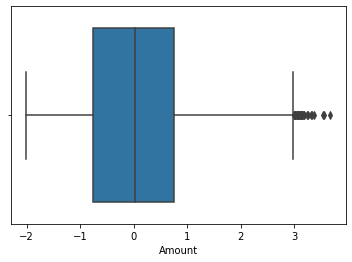

In [19]:
# Now we will scale the amount column and check for outliers again

scale = StandardScaler()

ccf['Amount'] = scale.fit_transform(ccf[['Amount']])

sns.boxplot(ccf['Amount'])

In [20]:
outlier = ccf['Amount'] > 3 # counting outliers
outlier.count()

283726

In [21]:
# let us drop these outliers

ccf['Amount']=ccf['Amount'] < 3 #dropping outliers

<AxesSubplot:>

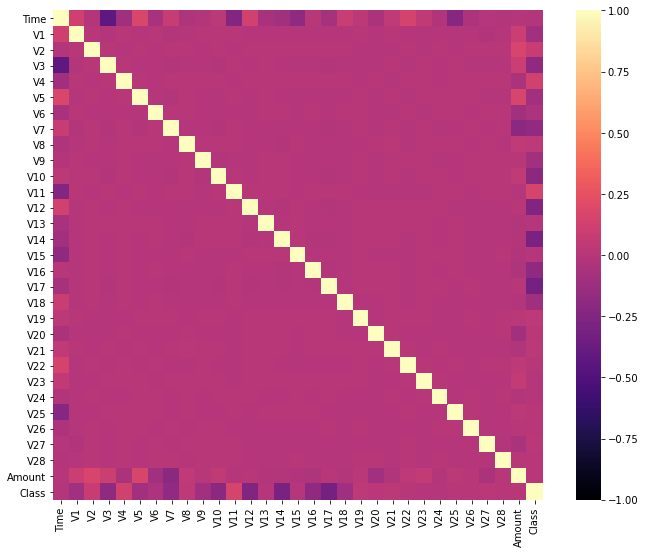

In [22]:
# let us see the correlation between the features

corrmat = ccf.corr()
plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap='magma')

We can see that Amount and Class show a negative correlation among the data from v1 to v-18 approximately. We will take an undersampled sample to see the  more clear pictrure of the relationships that could be formed, as it is difficult to see the same in the large datasets.


In [23]:
#We shuffle the data to random select nonfraud data.

df_sample = ccf.copy()

shuffled_indices = np.arange(df_sample.shape[0])
np.random.shuffle(shuffled_indices)
df_shuffled = df_sample.iloc[shuffled_indices]

fraud_sampled = df_shuffled.loc[df_shuffled['Class']==1]
nonfraud_sampled = df_shuffled.loc[df_shuffled['Class']==0][:492]

undersampled_df= pd.concat([fraud_sampled,nonfraud_sampled])

In [24]:
undersampled_df['Class'].value_counts()

0    492
1    473
Name: Class, dtype: int64

Text(0.5, 1.02, 'Correlation Matrix for Undersampled Data')

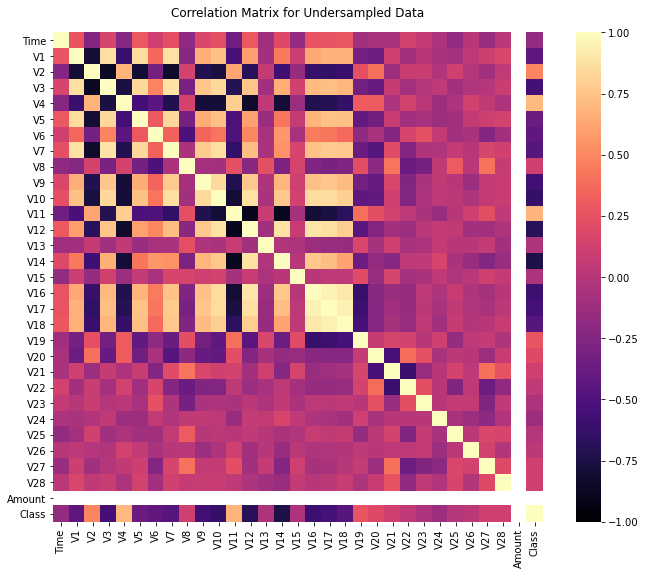

In [25]:
cormat = undersampled_df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(cormat, vmax=1, vmin=-1, cmap='magma',square=True)
plt.title("Correlation Matrix for Undersampled Data", y=1.02)

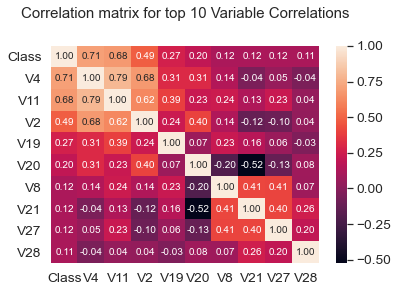

In [26]:
cols = cormat.nlargest(10, 'Class')['Class'].index
cm = undersampled_df[cols].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10})
plt.title("Correlation matrix for top 10 Variable Correlations", y=1.1)
plt.show()

We can now see that there is a strong correlation between class, v4, v11 and v2 columns

### Splitting data

Data Split to train and test models

In [27]:
X = df_sample.iloc[:,:-1]
y= df_sample.iloc[:,-1]

X_scal_train, X_scal_test, y_scal_train, y_scal_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Applying resampling technique - SMOTE

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

##### pip install -U imbalanced-learn  ------ to install the module for the first time

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
#SMOTE data train split
smote = SMOTE(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)
print(y_resampled[y_resampled==1].sum())
print(y_resampled[y_resampled==0].count())

X_resam_train, X_resam_test, y_resam_train, y_resam_test = train_test_split(X_resampled, y_resampled, test_size=0.2, 
                                                                            random_state=42)

283253
283253


In [30]:
y_resampled.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [31]:
from collections import Counter

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_resampled))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


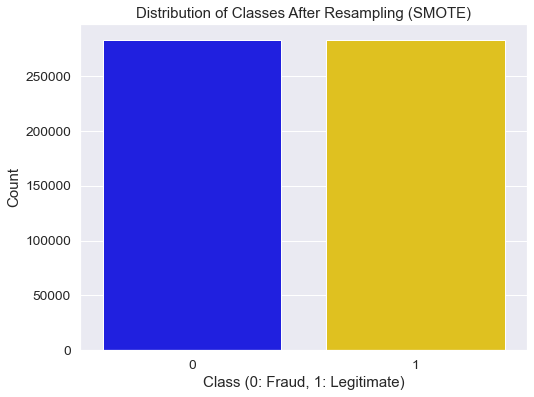

In [32]:
## distribution of class after applying smote

custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette=custom_palette)
plt.title("Distribution of Classes After Resampling (SMOTE)")
plt.xlabel("Class (0: Fraud, 1: Legitimate)")
plt.ylabel("Count")
plt.show()

### Model Building and Testing

In [33]:
# Logistic Regression

#testing on resampled data
model = LogisticRegression(class_weight = 'balanced') #creating model 
model.fit(X_resam_train,y_resam_train)
print('Logistic Regression')
print('Train Data Score:', model.score(X_resam_train,y_resam_train))
print('Test Data Score:', model.score(X_resam_test,y_resam_test))
print( 'CVS Score:', cross_val_score(model,X_resampled, y_resampled,cv=5,).mean())

Logistic Regression
Train Data Score: 0.9704548062241286
Test Data Score: 0.9701593970097615
CVS Score: 0.9658838927912502


### Saving our model

In [34]:
# using pickle method to save our model for future use

from pickle import dump
dump(model,open('creditcardfrauddetection.pkl','wb'))

In [35]:
Y_pred_logistic = model.predict(X_resam_test)

### Prediction on New data

In [36]:
data = {'Time': [19],'V1': [1.322707269],'V2': [-0.174040833],'V3': [0.434555031],'V4': [0.576037652],
            'V5': [-0.836758046],'V6': [-0.831083411],'V7': [-0.264904961],'V8': [-0.220981943],'V9': [-1.071424618],
            'V10': [0.868558548],'V11': [-0.64150629],'V12': [-0.111315775],'V13': [0.36148541],'V14': [0.171945122],
            'V15': [0.782166532],'V16': [-1.35587073],'V17': [-0.216935153],'V18': [1.271765385],'V19': [-1.240621935],
            'V20': [-0.522950941],'V21': [-0.284375572],'V22': [-0.323357411],'V23': [-0.037709905],'V24': [0.347150939],
            'V25': [0.559639137],'V26': [-0.280158166],'V27': [0.042335258],'V28': [0.0288223],'Amount': [0],'Class': [0]}

new_data = pd.DataFrame(data)

In [37]:
new_predictions = model.predict(new_data.drop(columns=['Class']))

if new_predictions[0] == 1:
    print("Time: 19\nPredict: Fraudulent Transaction")
else:
    print("Time: 19\nPredict: Genuine Transaction")

Time: 19
Predict: Fraudulent Transaction


### Evaluation of Model Performance 

Precision: It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

Recall(Sensitivity): It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

F1-Score: The weighted average of precision and recall.
    
Confusion Matrix: A table showing correct predictions and types of incorrect predictions.

In [38]:
# Calculate performance metrics for the Logistic Regression model
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_logistic = confusion_matrix(y_resam_test, Y_pred_logistic)
classification_report_logistic = classification_report(y_resam_test, Y_pred_logistic, output_dict=True)

confusion_matrix_df = pd.DataFrame(confusion_matrix_logistic, 
                                   columns=["Predicted Negative (0)", "Predicted Positive (1)"],
                                   index=["Actual Negative (0)", "Actual Positive (1)"])

classification_report_df = pd.DataFrame(classification_report_logistic)

print("Logistic Regression Model - Confusion Matrix:")
print(confusion_matrix_df)

print("\nLogistic Regression Model - Classification Report:")
print(classification_report_df)

Logistic Regression Model - Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                   55404                    1059
Actual Positive (1)                    2322                   54517

Logistic Regression Model - Classification Report:
                      0             1  accuracy      macro avg   weighted avg
precision      0.959775      0.980945  0.970159       0.970360       0.970395
recall         0.981244      0.959148  0.970159       0.970196       0.970159
f1-score       0.970391      0.969924  0.970159       0.970158       0.970157
support    56463.000000  56839.000000  0.970159  113302.000000  113302.000000


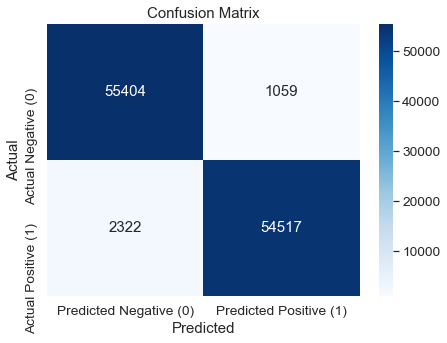

In [39]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

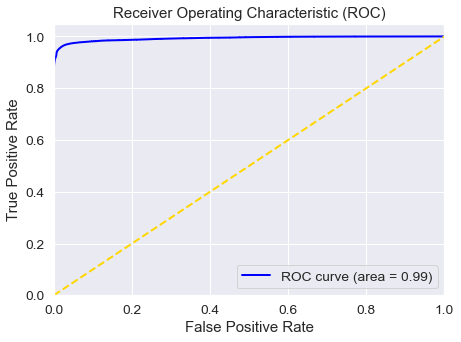

In [40]:
# Calculate ROC-AUC Score and Plot ROC Curve
from sklearn.metrics import roc_curve, auc
y_scores = model.predict_proba(X_resam_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_resam_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gold', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

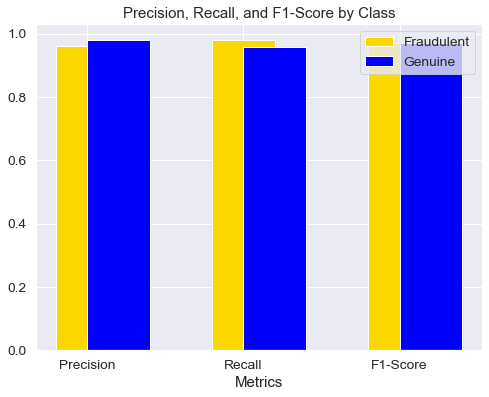

In [41]:
fraud_metrics = [classification_report_df['0']['precision'], classification_report_df['0']['recall'], classification_report_df['0']['f1-score']]
legitimate_metrics = [classification_report_df['1']['precision'], classification_report_df['1']['recall'], classification_report_df['1']['f1-score']]

metrics_labels = ['Precision', 'Recall', 'F1-Score']
x = range(len(metrics_labels))

plt.figure(figsize=(8, 6))
plt.bar(x, fraud_metrics, width=0.4, label='Fraudulent', align='center', color='gold')
plt.bar(x, legitimate_metrics, width=0.4, label='Genuine', align='edge', color='blue')
plt.xlabel('Metrics')
plt.xticks(x, metrics_labels)
plt.title("Precision, Recall, and F1-Score by Class")
plt.legend()
plt.show()

Conclusion:
    
    Our model gives a good score. As well as the scores for Precision Recall and F1.Score all are around 0.9. 
    
    Which states that our model gives good result.
    